In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
class grad_descent:
    def __init__(self, lr, h=1e-6):
        self.lr = lr
        self.h  = h 
        
    def ngrad(self, f, a):
        dx = (f(a[0]+self.h, a[1]) - f(a[0]-self.h, a[1]))/(2*self.h)
        dy = (f(a[0], a[1]+self.h) -f(a[0], a[1]-self.h))/(2*self.h)
        return np.array([dx,dy])
        
        
    def update(self, f, a):
        dz = self.lr * self.ngrad(f, a)
        return np.array(a) - dz 
    
    def __str__(self):
        return '경사하강법(lr=%s)' %self.lr
        

In [21]:
class two_variable_ftn:
    
    def __init__(self, ftn, opti):
        self.ftn = ftn
        self.opti = opti
        
    def run(self, x0, iteration):
        self.xs = [x0]
        for j in range(iteration):
            self.xs.append(self.opti.update(self.ftn, self.xs[-1]))
        print(""" (%s, %s)에서 시작해서 %s번 %s을 적용한 결과는 (%.3f, %.3f) 입니다.
        """%(x0[0], x0[1], iteration, self.opti, self.xs[-1][0], self.xs[-1][1]))
        pass

    def visualize(self, xi, xe, yi, ye):
        plt.figure(figsize=(6,6))
        temp = np.array(self.xs)
        xdata, ydata = temp[:,0], temp[:,1]
        plt.axis('equal')
        plt.axis([xi,xe, yi, ye])
        plt.scatter(xdata, ydata, s=10)
        return plt.show()

 (4, 4)에서 시작해서 200번 경사하강법(lr=0.01)을 적용한 결과는 (0.070, 0.070) 입니다.
        


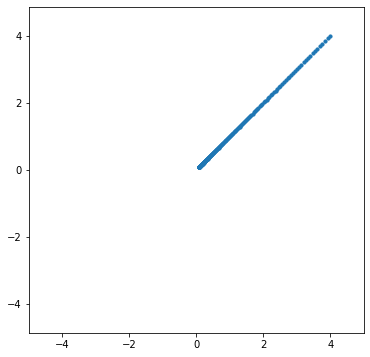

In [22]:
f = lambda x, y : x**2 + y**2
opti1 = grad_descent(0.01)
ex1 = two_variable_ftn(f, opti1)
ex1.run([4,4], 200)
ex1.visualize(-5,5,-5,5)

 (4, 4)에서 시작해서 400번 경사하강법(lr=0.01)을 적용한 결과는 (0.001, 1.796) 입니다.
        


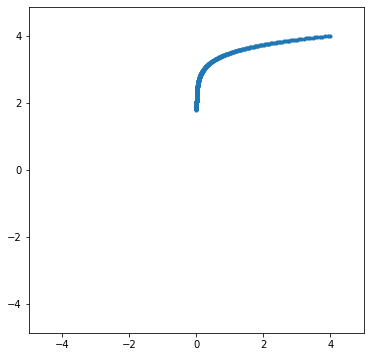

In [25]:
f2 = lambda x, y : x**2 + y**2 /10
opti1 = grad_descent(0.01)
ex2 = two_variable_ftn(f2, opti1)
ex2.run([4,4], 400)
ex2.visualize(-5,5,-5,5)

In [31]:
class RMSProp:
    def __init__(self, gamma, lr, h=1e-6):
        self.gamma = gamma
        self.lr = lr
        self.h  = h
        self.previous = np.zeros(2)
    
    def ngrad(self, f, a):
        dx = (f(a[0]+self.h, a[1]) - f(a[0]-self.h, a[1]))/(2*self.h)
        dy = (f(a[0], a[1]+self.h) -f(a[0], a[1]-self.h))/(2*self.h)
        return np.array([dx,dy])
        
    def update(self, f, a):
        grad_f = self.ngrad(f, a)
        self.previous = self.gamma *self.previous + (1-self.gamma)*grad_f**2
        return np.array(a) -self.lr * grad_f/(np.sqrt(self.previous)+1e-8)
    
    def __str__(self):
        return 'RMSProp(gamma=%s, lr=%s)' %(self.gamma, self.lr)
        

 (4, 4)에서 시작해서 400번 RMSProp(gamma=0.9, lr=0.01)을 적용한 결과는 (0.172, 0.172) 입니다.
        


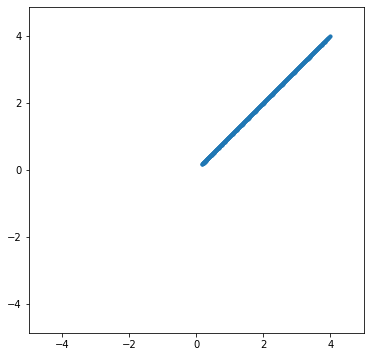

In [32]:
f2 = lambda x, y : x**2 + y**2 /10
opti2 = RMSProp(0.9, 0.01)
ex3 = two_variable_ftn(f2, opti2)
ex3.run([4,4], 400)
ex3.visualize(-5,5,-5,5)

In [35]:
class Momentum_descent:
    def __init__(self, mu, lr, h=1e-6):
        self.mu = mu
        self.lr = lr
        self.h = h
        self.previous = np.zeros(2)
        
    def ngrad(self, f, a):
        dx = (f(a[0]+self.h, a[1]) - f(a[0]-self.h, a[1]))/(2*self.h)
        dy = (f(a[0], a[1]+self.h) -f(a[0], a[1]-self.h))/(2*self.h)
        return np.array([dx, dy])
    
    def update(self, f, a):
        self.previous = self.mu * self.previous - self.lr * self.ngrad(f, a) 
        return np.array(a) + self.previous 
    
    def __str__(self):
        return '모멘텀(mu=%s, lr=%s)' %(self.mu, self.lr)
        

 (4, 4)에서 시작해서 200번 모멘텀(mu=0.9, lr=0.01)을 적용한 결과는 (-0.000, 0.028) 입니다.
        


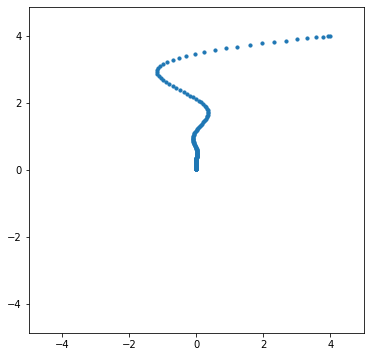

In [37]:
f2 = lambda x, y : x**2 + y**2 /10
opti3 = Momentum_descent(0.9, 0.01)
ex3 = two_variable_ftn(f2, opti3)
ex3.run([4,4], 200)
ex3.visualize(-5,5,-5,5)

In [40]:
class ADAM:
    def __init__(self, beta1, beta2, lr, h=1e-6):
        self.beta1 = beta1
        self.beta2 = beta2
        self.lr = lr
        self.dz_m = np.zeros(2) #momentum 
        self.dz_p = np.zeros(2) #adaptive 
        self.ctr = 1 #counter
        self.h = h
    
    def ngrad(self, f, a):
        dx = (f(a[0]+self.h, a[1]) - f(a[0]-self.h, a[1]))/(2*self.h)
        dy = (f(a[0], a[1]+self.h) -f(a[0], a[1]-self.h))/(2*self.h)
        return np.array([dx, dy])
        
    def update(self, f, a):
        dz = self.ngrad(f, a)
        self.dz_m = self.beta1 * self.dz_m +(1-self.beta1)*dz
        self.dz_p = self.beta2 *self.dz_p + (1-self.beta2)*dz**2
        mhat = self.dz_m / (1- self.beta1**self.ctr)
        phat = self.dz_p/ (1-self.beta2**self.ctr)
        self.ctr +=1
        return np.array(a) -self.lr * mhat/(np.sqrt(phat)+1e-8) 
    
    def __str__(self):
        return 'ADAM(beta_1=%s, beta_2 =%s, lr=%s)' %(self.beta1, self.beta2, self.lr)
    
        

 (4, 4)에서 시작해서 400번 ADAM(beta_1=0.9, beta_2 =0.9, lr=0.01)을 적용한 결과는 (0.032, 0.032) 입니다.
        


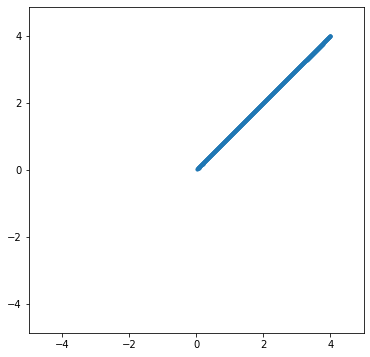

In [42]:
f2 = lambda x, y : x**2 + y**2 /10
opti4 = ADAM(0.9, 0.9,  0.01)
ex4 = two_variable_ftn(f2, opti4)
ex4.run([4,4], 400)
ex4.visualize(-5,5,-5,5)